In [1]:
#import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics

In [2]:
#load in data
data = pd.read_csv('cbb_winpct_model_data.csv')
data.head()

,ADJOE,ADJDE,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,3P_O,3P_D,ADJ_T,WIN_PCT,POWER_CONF
0,123.3,94.9,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,32.7,36.2,71.7,0.825000,1
1,129.1,93.6,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,36.5,37.5,59.3,0.900000,1
2,114.4,90.4,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,35.2,33.2,65.9,0.825000,1
3,115.2,85.2,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,36.5,29.7,67.5,0.815789,1
4,117.8,86.3,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,38.2,29.0,71.5,0.948718,1


In [3]:
#split data into features and target variable
X = data.drop('WIN_PCT', axis=1)
y = data['WIN_PCT']
#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)
#initialize and fit the model
gbr = GradientBoostingRegressor(random_state=16)
gbr.fit(X_train, y_train)



,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


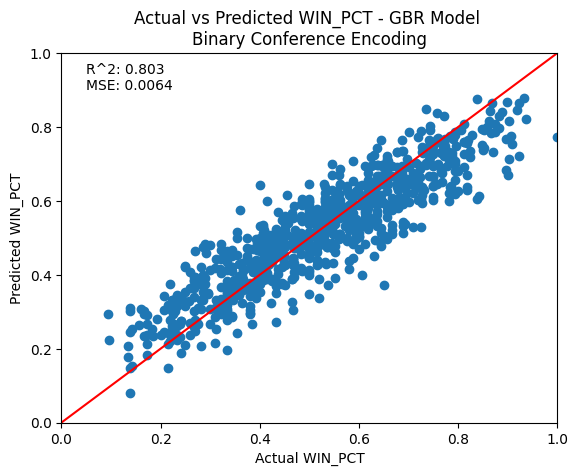

RMSE: 0.079087475240467
R^2: 0.8033501973680739


In [14]:
#make predictions
y_pred = gbr.predict(X_test)
#plot predicted vs actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual WIN_PCT')
plt.ylabel('Predicted WIN_PCT')
plt.title('Actual vs Predicted WIN_PCT - GBR Model \nBinary Conference Encoding')
plt.plot([0, 1], [0, 1], color='red')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.annotate(f'R^2: {metrics.r2_score(y_test, y_pred):.3f}\nMSE: {metrics.mean_squared_error(y_test, y_pred_ohe):.4f}', xy=(0.05, 0.9), xycoords='axes fraction')
plt.show()
#evaluate the model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

Hyperparameter tuning to see if we can make the model even better.

In [ ]:
#Here, I am choosing only some of the available hyperameters
params = {'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
          'n_estimators': [100, 200, 300, 400, 500],
          'learning_rate': [0.01, 0.05, 0.1, 0.2],
          'max_depth': [1,2, 3, 4, 5]}

gbr_grid = RandomizedSearchCV(estimator = gbr,
                              param_distributions=params)

gbr_grid.fit(X_train, y_train)
print(f'Best Hyperparameters: {gbr_grid.best_params_}')

Best Hyperparameters: {'n_estimators': 400, 'max_depth': 3, 'loss': 'squared_error', 'learning_rate': 0.05}


Tuned Mean Absolute Error: 0.05978770765072743
Tuned Mean Squared Error: 0.005634224376183063
Tuned Root Mean Squared Error: 0.07506147065028144
Tuned R^2 Score: 0.8228617988386255


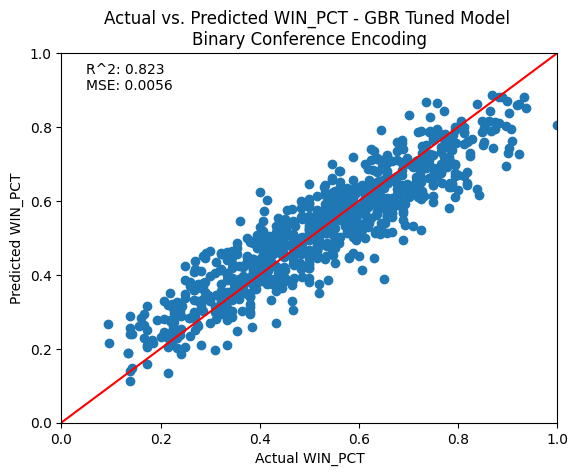

In [15]:
best_params = gbr_grid.best_params_
gbr_tuned = GradientBoostingRegressor(**best_params)
gbr_tuned.fit(X_train, y_train)

y_pred_tuned = gbr_tuned.predict(X_test)

print(f'Tuned Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred_tuned)}')
print(f'Tuned Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred_tuned)}')
print(f'Tuned Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_tuned))}')
print(f'Tuned R^2 Score: {metrics.r2_score(y_test, y_pred_tuned)}')

plt.scatter(y_test, y_pred_tuned)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Actual WIN_PCT")
plt.ylabel("Predicted WIN_PCT")
plt.plot([0, 1], [0, 1], color='red')
plt.title("Actual vs. Predicted WIN_PCT - GBR Tuned Model \nBinary Conference Encoding")
plt.annotate(f'R^2: {metrics.r2_score(y_test, y_pred_tuned):.3f}\nMSE: {metrics.mean_squared_error(y_test, y_pred_tuned):.4f}', xy=(0.05, 0.9), xycoords='axes fraction')
plt.show()

       Feature  Importance
0        ADJOE    0.374184
3        EFG_D    0.155718
2        EFG_O    0.139327
1        ADJDE    0.123794
5         TORD    0.054688
4          TOR    0.039024
7          DRB    0.032844
11        3P_D    0.024223
6          ORB    0.023835
13  POWER_CONF    0.015740
9         FTRD    0.008701
8          FTR    0.004461
12       ADJ_T    0.002293
10        3P_O    0.001168


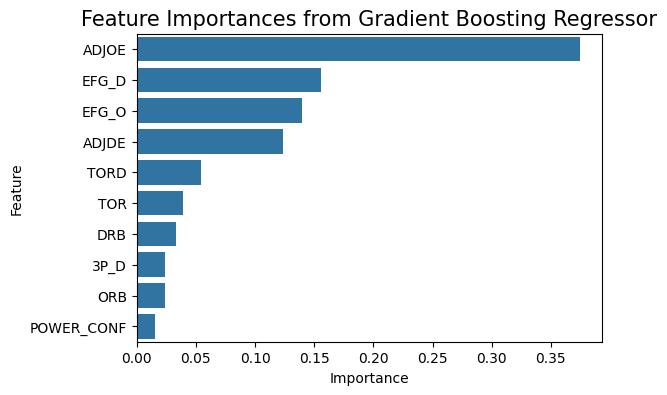

In [7]:
#most important features
importances = gbr.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)
#plot feature importances
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importances[:10])
plt.title('Feature Importances from Gradient Boosting Regressor', fontsize=15)
plt.show()

Now to use GBR on the one-hot encoded dataset.

In [8]:
#load in winpct data with one-hot encoding for conference
cbb_winpct_ohe = pd.read_csv('cbb_winpct_ohe_model_data.csv')
cbb_winpct_ohe.head()

,ADJOE,ADJDE,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,3P_O,3P_D,ADJ_T,WIN_PCT,CONF_ACC,CONF_AE,CONF_ASun,CONF_Amer,CONF_B10,CONF_B12,CONF_BE,CONF_BSky,CONF_BSth,CONF_BW,CONF_CAA,CONF_CUSA,CONF_GWC,CONF_Horz,CONF_Ind,CONF_Ivy,CONF_MAAC,CONF_MAC,CONF_MEAC,CONF_MVC,CONF_MWC,CONF_NEC,CONF_OVC,CONF_P12,CONF_Pat,CONF_SB,CONF_SC,CONF_SEC,CONF_SWAC,CONF_Slnd,CONF_Sum,CONF_WAC,CONF_WCC
0,123.3,94.9,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,32.7,36.2,71.7,0.825000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,129.1,93.6,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,36.5,37.5,59.3,0.900000,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,114.4,90.4,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,35.2,33.2,65.9,0.825000,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,115.2,85.2,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,36.5,29.7,67.5,0.815789,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,117.8,86.3,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,38.2,29.0,71.5,0.948718,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


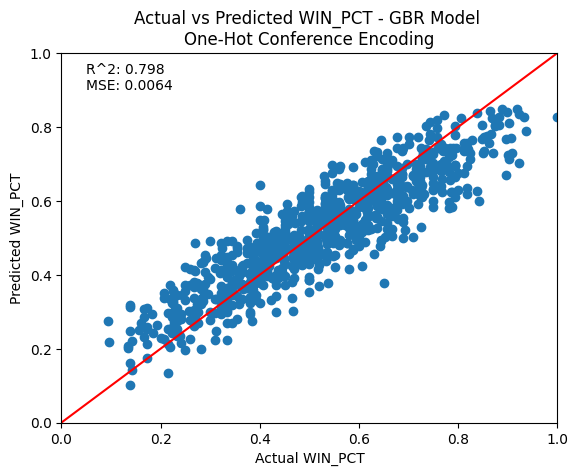

RMSE: 0.08021884191680256
R^2: 0.7976837028583925


In [16]:
X_ohe = cbb_winpct_ohe.drop('WIN_PCT', axis=1)
y_ohe = cbb_winpct_ohe['WIN_PCT']
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_ohe, y_ohe, test_size=0.2, random_state=16)
gbr_ohe = GradientBoostingRegressor(random_state=16)
gbr_ohe.fit(X_train_ohe, y_train_ohe)
y_pred_ohe = gbr_ohe.predict(X_test_ohe)
plt.scatter(y_test_ohe, y_pred_ohe)
plt.xlabel('Actual WIN_PCT')
plt.ylabel('Predicted WIN_PCT')
plt.title('Actual vs Predicted WIN_PCT - GBR Model \nOne-Hot Conference Encoding')
plt.plot([0, 1], [0, 1], color='red')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.annotate(f'R^2: {metrics.r2_score(y_test_ohe, y_pred_ohe):.3f}\nMSE: {metrics.mean_squared_error(y_test_ohe, y_pred_ohe):.4f}', xy=(0.05, 0.9), xycoords='axes fraction')
plt.show()
mse_ohe = metrics.mean_squared_error(y_test_ohe, y_pred_ohe)
rmse_ohe = np.sqrt(mse_ohe)
r2_ohe = metrics.r2_score(y_test_ohe, y_pred_ohe)
print(f'RMSE: {rmse_ohe}')
print(f'R^2: {r2_ohe}')

Now for hyperparameter tuning on the OHE GBR model

In [10]:
gbr_ohe_params = {'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
                  'n_estimators': [100, 200, 300, 400, 500],
                  'learning_rate': [0.01, 0.05, 0.1, 0.2],
                  'max_depth': [1,2, 3, 4, 5]}

gbr_ohe_grid = RandomizedSearchCV(estimator = gbr_ohe,
                              param_distributions=gbr_ohe_params)

gbr_ohe_grid.fit(X_train_ohe, y_train_ohe)
print(f'Best Hyperparameters: {gbr_ohe_grid.best_params_}')

Best Hyperparameters: {'n_estimators': 200, 'max_depth': 3, 'loss': 'squared_error', 'learning_rate': 0.1}


Tuned Mean Absolute Error: 0.059377134687207754
Tuned Mean Squared Error: 0.005479163965905444
Tuned Root Mean Squared Error: 0.07402137506089335
Tuned R^2 Score: 0.8277368482356696


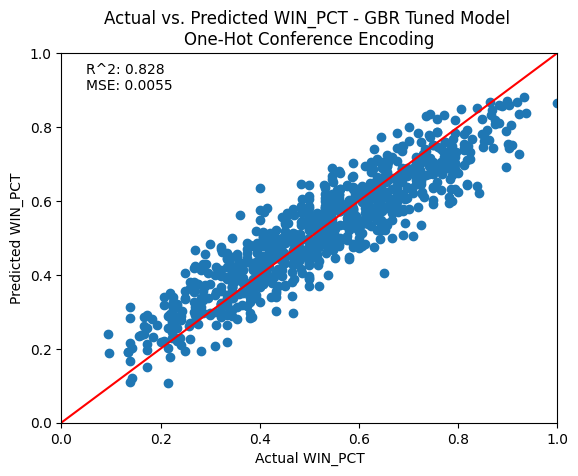

In [17]:
best_gbr_ohe_params = gbr_ohe_grid.best_params_
gbr_ohe_tuned = GradientBoostingRegressor(**best_gbr_ohe_params)
gbr_ohe_tuned.fit(X_train_ohe, y_train_ohe)
y_pred_ohe_tuned = gbr_ohe_tuned.predict(X_test_ohe)
print(f'Tuned Mean Absolute Error: {metrics.mean_absolute_error(y_test_ohe, y_pred_ohe_tuned)}')
print(f'Tuned Mean Squared Error: {metrics.mean_squared_error(y_test_ohe, y_pred_ohe_tuned)}')
print(f'Tuned Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test_ohe, y_pred_ohe_tuned))}')
print(f'Tuned R^2 Score: {metrics.r2_score(y_test_ohe, y_pred_ohe_tuned)}')
plt.scatter(y_test_ohe, y_pred_ohe_tuned)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Actual WIN_PCT")
plt.ylabel("Predicted WIN_PCT")
plt.plot([0, 1], [0, 1], color='red')
plt.title("Actual vs. Predicted WIN_PCT - GBR Tuned Model \nOne-Hot Conference Encoding")
plt.annotate(f'R^2: {metrics.r2_score(y_test_ohe, y_pred_ohe_tuned):.3f}\nMSE: {metrics.mean_squared_error(y_test_ohe, y_pred_ohe_tuned):.4f}', xy=(0.05, 0.9), xycoords='axes fraction')
plt.show()

      Feature  Importance
0       ADJOE    0.372459
3       EFG_D    0.163384
2       EFG_O    0.140369
1       ADJDE    0.113886
5        TORD    0.055401
4         TOR    0.039285
7         DRB    0.034137
6         ORB    0.022823
11       3P_D    0.020122
9        FTRD    0.007394
8         FTR    0.004716
42  CONF_Slnd    0.003624
17   CONF_B10    0.003251
13   CONF_ACC    0.003085
40   CONF_SEC    0.002185
31  CONF_MEAC    0.002102
36   CONF_P12    0.001982
41  CONF_SWAC    0.001738
19    CONF_BE    0.001601
18   CONF_B12    0.001427
35   CONF_OVC    0.001174
12      ADJ_T    0.001152
10       3P_O    0.000901
15  CONF_ASun    0.000492
34   CONF_NEC    0.000417
23   CONF_CAA    0.000319
20  CONF_BSky    0.000301
16  CONF_Amer    0.000168
43   CONF_Sum    0.000106
14    CONF_AE    0.000000
29  CONF_MAAC    0.000000
28   CONF_Ivy    0.000000
27   CONF_Ind    0.000000
26  CONF_Horz    0.000000
25   CONF_GWC    0.000000
24  CONF_CUSA    0.000000
22    CONF_BW    0.000000
21  CONF_BSt

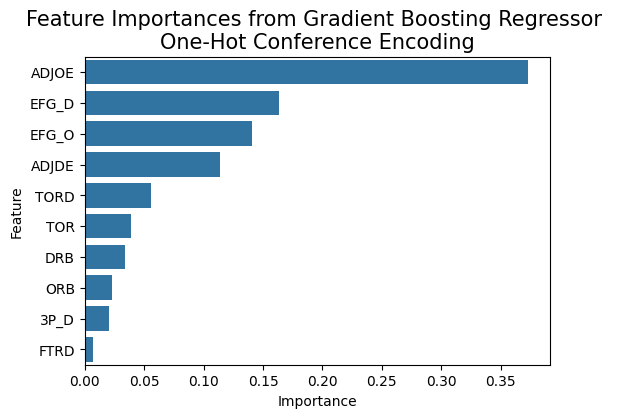

In [12]:
#most important features for one-hot encoded model
importances_ohe = gbr_ohe.feature_importances_
feature_names_ohe = X_ohe.columns
feature_importances_ohe = pd.DataFrame({'Feature': feature_names_ohe, 'Importance': importances_ohe})
feature_importances_ohe = feature_importances_ohe.sort_values(by='Importance', ascending=False)
print(feature_importances_ohe)
#plot feature importances for one-hot encoded model
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importances_ohe[:10])
plt.title('Feature Importances from Gradient Boosting Regressor \nOne-Hot Conference Encoding', fontsize=15)
plt.show()  

AUC metrics

In [13]:
from sklearn.metrics import roc_curve, auc
y_prob_test = gbr_tuned.predict(X_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_prob_test)
roc_auc_test = auc(fpr_test, tpr_test)

y_prob_train = gbr_tuned.predict(X_train)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_prob_train)
roc_auc_train = auc(fpr_train, tpr_train)
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC Test curve (AUC Testing = %0.2f)' % roc_auc)
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC Train curve (AUC Training = %0.2f)' % roc_auc_train)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC for GBR - Binary Conference Encoding')

ValueError: continuous format is not supported